In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier,plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


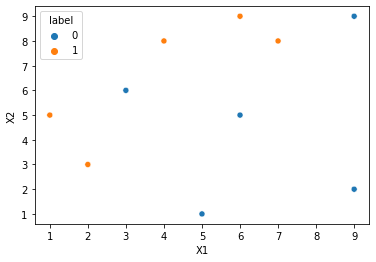

In [3]:
sns.scatterplot(df['X1'],df['X2'],hue=df.label)
plt.show()

In [4]:
# step-1 : Weight-intialization
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [5]:
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.loc[:,['X1','X2']].values
y = df.loc[:,'label'].values


In [6]:
# step-2: train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

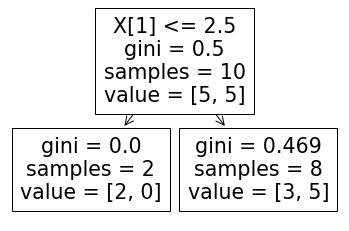

In [7]:
plot_tree(dt1)

<AxesSubplot:>

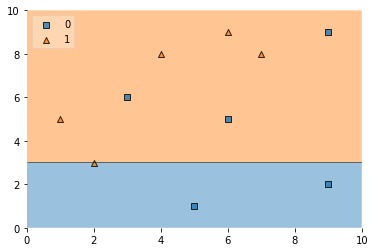

In [8]:
plot_decision_regions(X,y,dt1,legend=2)

In [9]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [10]:
def calculate_model_weight(error):
    return round(0.5*np.log((1-error)/(error)),3)

In [32]:
def error(df,target,predict,weight):
    return round(df.loc[np.where(df[target] != df[predict])][weight].sum(),3)

In [33]:
# step-3: calculate model weight

e = error(df,'label','y_pred','weights')
alpha1 = calculate_model_wight(e)
alpha1

0.424

In [13]:
# step-4 : updated weights

def update_row_weights(df,alpha=alpha1):
    if df['label'] == df['y_pred']:
        return df['weights']*np.exp(-alpha-0.00001)
    else:
        return df['weights']*np.exp(alpha+0.00001)

In [14]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065442
1,2,3,1,0.1,1,0.065442
2,3,6,0,0.1,1,0.152808
3,4,8,1,0.1,1,0.065442
4,5,1,0,0.1,0,0.065442
5,6,9,1,0.1,1,0.065442
6,6,5,0,0.1,1,0.152808
7,7,8,1,0.1,1,0.065442
8,9,9,0,0.1,1,0.152808
9,9,2,0,0.1,0,0.065442


In [15]:
# step- 5: normalize the updated weight
df['normazied_weights'] = df.updated_weights/df.updated_weights.sum()
df

,X1,X2,label,weights,y_pred,updated_weights,normazied_weights
0,1,5,1,0.1,1,0.065442,0.071403
1,2,3,1,0.1,1,0.065442,0.071403
2,3,6,0,0.1,1,0.152808,0.166727
3,4,8,1,0.1,1,0.065442,0.071403
4,5,1,0,0.1,0,0.065442,0.071403
5,6,9,1,0.1,1,0.065442,0.071403
6,6,5,0,0.1,1,0.152808,0.166727
7,7,8,1,0.1,1,0.065442,0.071403
8,9,9,0,0.1,1,0.152808,0.166727
9,9,2,0,0.1,0,0.065442,0.071403


In [16]:
# step 6 : make range next model

df['cumsum_upper'] = np.cumsum(df['normazied_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normazied_weights']
df

,X1,X2,label,weights,y_pred,updated_weights,normazied_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065442,0.071403,0.071403,0.000000
1,2,3,1,0.1,1,0.065442,0.071403,0.142806,0.071403
2,3,6,0,0.1,1,0.152808,0.166727,0.309532,0.142806
3,4,8,1,0.1,1,0.065442,0.071403,0.380935,0.309532
4,5,1,0,0.1,0,0.065442,0.071403,0.452338,0.380935
5,6,9,1,0.1,1,0.065442,0.071403,0.523741,0.452338
6,6,5,0,0.1,1,0.152808,0.166727,0.690468,0.523741
7,7,8,1,0.1,1,0.065442,0.071403,0.761870,0.690468
8,9,9,0,0.1,1,0.152808,0.166727,0.928597,0.761870
9,9,2,0,0.1,0,0.065442,0.071403,1.000000,0.928597


In [17]:
df.columns.tolist()

['X1',
 'X2',
 'label',
 'weights',
 'y_pred',
 'updated_weights',
 'normazied_weights',
 'cumsum_upper',
 'cumsum_lower']

In [18]:
df = df[['X1',
 'X2',
 'label',
 'weights',
 'y_pred',
 'updated_weights',
 'cumsum_lower',
 'cumsum_upper'
 ]]
df

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065442,0.000000,0.071403
1,2,3,1,0.1,1,0.065442,0.071403,0.142806
2,3,6,0,0.1,1,0.152808,0.142806,0.309532
3,4,8,1,0.1,1,0.065442,0.309532,0.380935
4,5,1,0,0.1,0,0.065442,0.380935,0.452338
5,6,9,1,0.1,1,0.065442,0.452338,0.523741
6,6,5,0,0.1,1,0.152808,0.523741,0.690468
7,7,8,1,0.1,1,0.065442,0.690468,0.761870
8,9,9,0,0.1,1,0.152808,0.761870,0.928597
9,9,2,0,0.1,0,0.065442,0.928597,1.000000


In [19]:
[i for i in df.iterrows()]

[(0,
  X1                 1.000000
  X2                 5.000000
  label              1.000000
  weights            0.100000
  y_pred             1.000000
  updated_weights    0.065442
  cumsum_lower       0.000000
  cumsum_upper       0.071403
  Name: 0, dtype: float64),
 (1,
  X1                 2.000000
  X2                 3.000000
  label              1.000000
  weights            0.100000
  y_pred             1.000000
  updated_weights    0.065442
  cumsum_lower       0.071403
  cumsum_upper       0.142806
  Name: 1, dtype: float64),
 (2,
  X1                 3.000000
  X2                 6.000000
  label              0.000000
  weights            0.100000
  y_pred             1.000000
  updated_weights    0.152808
  cumsum_lower       0.142806
  cumsum_upper       0.309532
  Name: 2, dtype: float64),
 (3,
  X1                 4.000000
  X2                 8.000000
  label              1.000000
  weights            0.100000
  y_pred             1.000000
  updated_weights    0.065

In [20]:
[i for i in df.iteritems()]

[('X1',
  0    1
  1    2
  2    3
  3    4
  4    5
  5    6
  6    6
  7    7
  8    9
  9    9
  Name: X1, dtype: int64),
 ('X2',
  0    5
  1    3
  2    6
  3    8
  4    1
  5    9
  6    5
  7    8
  8    9
  9    2
  Name: X2, dtype: int64),
 ('label',
  0    1
  1    1
  2    0
  3    1
  4    0
  5    1
  6    0
  7    1
  8    0
  9    0
  Name: label, dtype: int64),
 ('weights',
  0    0.1
  1    0.1
  2    0.1
  3    0.1
  4    0.1
  5    0.1
  6    0.1
  7    0.1
  8    0.1
  9    0.1
  Name: weights, dtype: float64),
 ('y_pred',
  0    1
  1    1
  2    1
  3    1
  4    0
  5    1
  6    1
  7    1
  8    1
  9    0
  Name: y_pred, dtype: int64),
 ('updated_weights',
  0    0.065442
  1    0.065442
  2    0.152808
  3    0.065442
  4    0.065442
  5    0.065442
  6    0.152808
  7    0.065442
  8    0.152808
  9    0.065442
  Name: updated_weights, dtype: float64),
 ('cumsum_lower',
  0    0.000000
  1    0.071403
  2    0.142806
  3    0.309532
  4    0.380935
  5    0

In [21]:
[i for i in df.itertuples()]

[Pandas(Index=0, X1=1, X2=5, label=1, weights=0.1, y_pred=1, updated_weights=0.06544173377027605, cumsum_lower=0.0, cumsum_upper=0.0714027807292352),
 Pandas(Index=1, X1=2, X2=3, label=1, weights=0.1, y_pred=1, updated_weights=0.06544173377027605, cumsum_lower=0.0714027807292352, cumsum_upper=0.1428055614584704),
 Pandas(Index=2, X1=3, X2=6, label=0, weights=0.1, y_pred=1, updated_weights=0.15280768744763984, cumsum_lower=0.1428055614584704, cumsum_upper=0.30953240642358826),
 Pandas(Index=3, X1=4, X2=8, label=1, weights=0.1, y_pred=1, updated_weights=0.06544173377027605, cumsum_lower=0.30953240642358826, cumsum_upper=0.3809351871528235),
 Pandas(Index=4, X1=5, X2=1, label=0, weights=0.1, y_pred=0, updated_weights=0.06544173377027605, cumsum_lower=0.3809351871528235, cumsum_upper=0.4523379678820587),
 Pandas(Index=5, X1=6, X2=9, label=1, weights=0.1, y_pred=1, updated_weights=0.06544173377027605, cumsum_lower=0.4523379678820587, cumsum_upper=0.5237407486112939),
 Pandas(Index=6, X1=6, 

In [22]:
def create_new_datasets(df):
    
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return   indices

In [23]:
index_value = create_new_datasets(df)
index_value

[4, 7, 4, 9, 8, 6, 4, 0, 6, 2]

In [24]:
df

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065442,0.000000,0.071403
1,2,3,1,0.1,1,0.065442,0.071403,0.142806
2,3,6,0,0.1,1,0.152808,0.142806,0.309532
3,4,8,1,0.1,1,0.065442,0.309532,0.380935
4,5,1,0,0.1,0,0.065442,0.380935,0.452338
5,6,9,1,0.1,1,0.065442,0.452338,0.523741
6,6,5,0,0.1,1,0.152808,0.523741,0.690468
7,7,8,1,0.1,1,0.065442,0.690468,0.761870
8,9,9,0,0.1,1,0.152808,0.761870,0.928597
9,9,2,0,0.1,0,0.065442,0.928597,1.000000


In [25]:
second_df = df.iloc[index_value,0:4]
second_df

,X1,X2,label,weights
4,5,1,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1


In [26]:
X = second_df.iloc[:,:2].values
y = second_df.iloc[:,-2].values

In [27]:
dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]')]

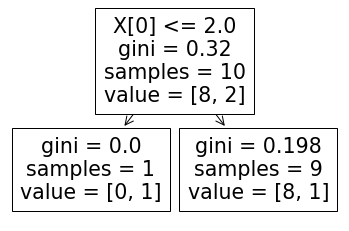

In [28]:
plot_tree(dt2)

<AxesSubplot:>

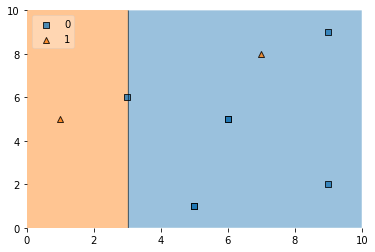

In [29]:
plot_decision_regions(X, y, dt2, legend=2)

In [30]:
second_df['y_pred'] = dt2.predict(X)
second_df   

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
7,7,8,1,0.1,0
4,5,1,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
4,5,1,0,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,0
2,3,6,0,0.1,0


In [36]:
# step-3: calculate model weight

#e = error(second_df,'label','y_pred','weights')
alpha2 = calculate_model_weight(0.1)
alpha2

1.099

In [37]:
# step-4 : updated weights

def update_row_weights(df,alpha=alpha2):
    if df['label'] == df['y_pred']:
        return df['weights']*np.exp(-alpha-0.00001)
    else:
        return df['weights']*np.exp(alpha+0.00001)

In [38]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df     

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033320
7,7,8,1,0.1,0,0.300119
4,5,1,0,0.1,0,0.033320
9,9,2,0,0.1,0,0.033320
8,9,9,0,0.1,0,0.033320
6,6,5,0,0.1,0,0.033320
4,5,1,0,0.1,0,0.033320
0,1,5,1,0.1,1,0.033320
6,6,5,0,0.1,0,0.033320
2,3,6,0,0.1,0,0.033320


In [39]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
     

In [40]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033320,0.055533
7,7,8,1,0.1,0,0.300119,0.500199
4,5,1,0,0.1,0,0.033320,0.055533
9,9,2,0,0.1,0,0.033320,0.055533
8,9,9,0,0.1,0,0.033320,0.055533
6,6,5,0,0.1,0,0.033320,0.055533
4,5,1,0,0.1,0,0.033320,0.055533
0,1,5,1,0.1,1,0.033320,0.055533
6,6,5,0,0.1,0,0.033320,0.055533
2,3,6,0,0.1,0,0.033320,0.055533


In [41]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [42]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])


In [43]:

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [44]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.055533,0.000000,0.055533
7,7,8,1,0.1,0,0.500199,0.055533,0.555732
4,5,1,0,0.1,0,0.055533,0.555732,0.611266
9,9,2,0,0.1,0,0.055533,0.611266,0.666799
8,9,9,0,0.1,0,0.055533,0.666799,0.722333
6,6,5,0,0.1,0,0.055533,0.722333,0.777866
4,5,1,0,0.1,0,0.055533,0.777866,0.833400
0,1,5,1,0.1,1,0.055533,0.833400,0.888933
6,6,5,0,0.1,0,0.055533,0.888933,0.944467
2,3,6,0,0.1,0,0.055533,0.944467,1.000000


In [46]:
index_values = create_new_datasets(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [47]:
third_df

,X1,X2,label,weights
2,3,6,0,0.1
0,1,5,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1


In [48]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

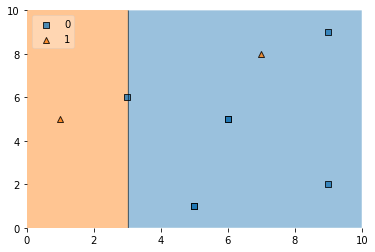

In [49]:

plot_decision_regions(X, y, clf=dt3, legend=2)

In [50]:

third_df['y_pred'] = dt3.predict(X)


In [51]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
0,1,5,1,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
4,5,1,0,0.1,0


In [53]:
alpha3 = calculate_model_weight(0.3)
alpha3

0.424

In [54]:

print(alpha1,alpha2,alpha3)

0.424 1.099 0.424


In [55]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [56]:
dt2.predict(query)

array([1], dtype=int64)

In [57]:
dt3.predict(query)

array([1], dtype=int64)

In [58]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.9469999999999998

In [59]:
np.sign(1.09)


1.0

In [60]:

query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [61]:
dt2.predict(query)

array([0], dtype=int64)

In [62]:

dt3.predict(query)

array([0], dtype=int64)

In [63]:

alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-1.099

In [64]:
np.sign(-1.099)

-1.0